# Regularization

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"


In [2]:
# import corc.complex_datasets
import corc.graph_metrics.neb
# import studenttmixture
import matplotlib.pyplot as plt
import numpy as np
# import sklearn
import corc.graph_metrics.tmm_gmm_neb
# import jax.numpy as jnp
# import corc.studentmixture
import corc.utils
import corc.tmm_plots

In [9]:
# dataset = "noisy_moons"
# dataset = "densired_soft_16"
dataset = "mnist16"
X,y,transformed_points = corc.utils.load_dataset(dataset)

In [12]:
tmm_models = list()
for i in range(4):
    tmm_model = corc.graph_metrics.neb.NEB(
        data=X,
        labels=y,
        n_components=15,
        optimization_iterations=15,
        tmm_regularization=0.1*10**-i
    )
    tmm_model.fit(X)
    tmm_models.append(tmm_model)


[[570  11]
 [993  10]
 [864  10]
 [447  11]
 [429  13]
 [524   9]
 [641  13]
 [966  12]
 [978  10]
 [378  14]
 [695  10]
 [523  10]
 [972  21]
 [401  10]
 [619  12]]
After filtering 15 components, we are left with 15 components
[[570  11]
 [993  10]
 [864  10]
 [447  11]
 [429  13]
 [524   9]
 [641  13]
 [966  12]
 [978  10]
 [378  14]
 [695  10]
 [523  10]
 [972  21]
 [401  10]
 [619  12]]


tmm: 100%|██████████| 105/105 [00:18<00:00,  5.79it/s]


[[652  31]
 [999  19]
 [605  22]
 [492  20]
 [330  37]
 [512  51]
 [645  72]
 [981  27]
 [999  17]
 [359  37]
 [893  34]
 [527  21]
 [973  53]
 [394  20]
 [639  25]]
After filtering 15 components, we are left with 15 components
[[652  31]
 [999  19]
 [605  22]
 [492  20]
 [330  37]
 [512  51]
 [645  72]
 [981  27]
 [999  17]
 [359  37]
 [893  34]
 [527  21]
 [973  53]
 [394  20]
 [639  25]]


tmm: 100%|██████████| 105/105 [00:18<00:00,  5.61it/s]


[[ 666   38]
 [1002   21]
 [ 600   28]
 [ 499   24]
 [ 316   50]
 [ 501   98]
 [ 652  149]
 [ 985   31]
 [1004   19]
 [ 360   45]
 [ 884   40]
 [ 529   24]
 [ 970   64]
 [ 390   23]
 [ 642   27]]
After filtering 15 components, we are left with 15 components
[[ 666   38]
 [1002   21]
 [ 600   28]
 [ 499   24]
 [ 316   50]
 [ 501   98]
 [ 652  149]
 [ 985   31]
 [1004   19]
 [ 360   45]
 [ 884   40]
 [ 529   24]
 [ 970   64]
 [ 390   23]
 [ 642   27]]


tmm: 100%|██████████| 105/105 [00:18<00:00,  5.68it/s]


[[ 667   39]
 [1002   21]
 [ 598   28]
 [ 500   25]
 [ 315   51]
 [ 496  109]
 [ 657  169]
 [ 985   32]
 [1004   19]
 [ 359   46]
 [ 884   41]
 [ 530   24]
 [ 970   65]
 [ 390   23]
 [ 643   28]]
After filtering 15 components, we are left with 15 components
[[ 667   39]
 [1002   21]
 [ 598   28]
 [ 500   25]
 [ 315   51]
 [ 496  109]
 [ 657  169]
 [ 985   32]
 [1004   19]
 [ 359   46]
 [ 884   41]
 [ 530   24]
 [ 970   65]
 [ 390   23]
 [ 643   28]]


tmm: 100%|██████████| 105/105 [00:18<00:00,  5.78it/s]


computing TSNE...done. (0.68s)


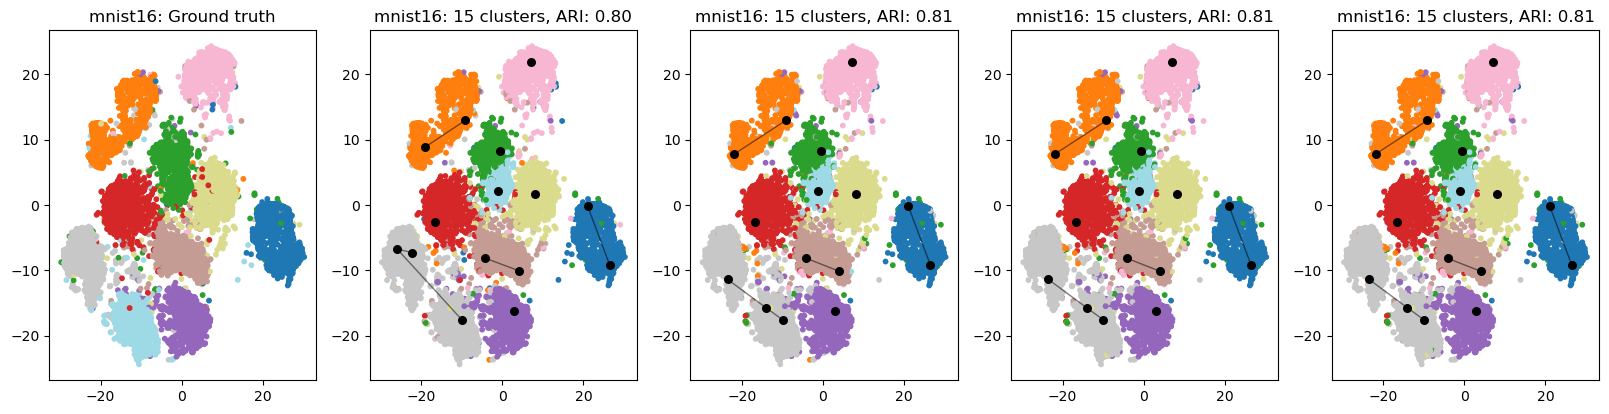

In [13]:
the_plot = corc.tmm_plots.plot_tmm_models(tmm_models,X,y,dataset)

In [13]:
tmm_model.get_merged_pairs(target_num_classes=2)

[(0, 4),
 (0, 6),
 (0, 8),
 (1, 3),
 (1, 5),
 (1, 6),
 (1, 11),
 (1, 13),
 (2, 7),
 (3, 9),
 (3, 12),
 (5, 10),
 (8, 14)]

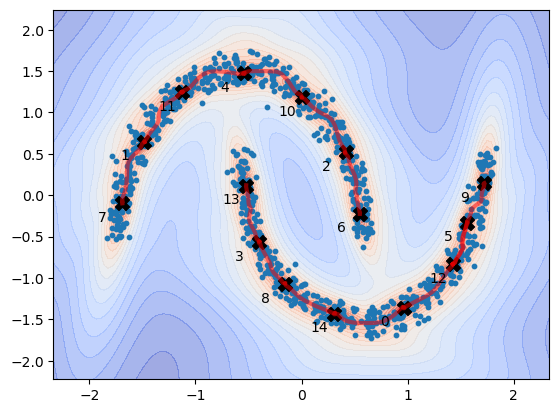

In [49]:
selection = tmm_model.get_merged_pairs(2)
corc.utils.plot_field(X,tmm_model.mixture_model,paths=tmm_model.paths_,selection=selection)

In [35]:
tmm_model.paths_[(0,1)]

Array([[-0.42971915, -0.42971915],
       [-0.4287427 , -0.4287427 ],
       [-0.42776567, -0.42776567],
       ...,
       [ 0.44249722,  0.44249722],
       [ 0.44146448,  0.44146448],
       [ 0.4408146 ,  0.4408146 ]], dtype=float32)

In [38]:
tmm_model.logprobs_[(0,1)]

Array([-0.90020895, -0.92666733, -0.9537842 , ..., -1.0840937 ,
       -1.0937178 , -1.1001486 ], dtype=float32)

In [46]:
tmm_model = corc.graph_metrics.neb.NEB(
    data=X,
    labels=y,
    n_components=15,
    optimization_iterations=15,
    tmm_regularization=10**-4
)
tmm_model.fit(X)

[[90  7]
 [59 15]
 [84 32]
 [48 26]
 [74  3]
 [29 24]
 [43 19]
 [67 32]
 [55 11]
 [58 35]
 [80 16]
 [93 14]
 [61 14]
 [64 23]
 [95 11]]
After filtering 15 components, we are left with 15 components
[[90  7]
 [59 15]
 [84 32]
 [48 26]
 [74  3]
 [29 24]
 [43 19]
 [67 32]
 [55 11]
 [58 35]
 [80 16]
 [93 14]
 [61 14]
 [64 23]
 [95 11]]


tmm:   0%|          | 0/105 [00:00<?, ?it/s]

(1024, 2) (1024, 2)


tmm: 100%|██████████| 105/105 [01:12<00:00,  1.44it/s]
